# CptS 481 - Python Software Construction

## Unit 19: Arrays

In [2]:
from IPython.display import HTML, Image
HTML(open("notes.css", "r").read())

In [39]:
allowExceptions = True # enable to allow the notebook to flag exceptions

In [4]:
from demo_array import demoArray # helpful package for demos (see below)

### Introduction

This lecture is really about ``numpy``.

* Web Site:

  http://www.scipy.org

* Book:

  Bressert, *SciPy and NumPy*, O'Reilly, 2013.

#### Chronology

  * In the beginning, there were Python lists and tuples, which were
    *way* too slow for numerical computation.

  * Shortly after the beginning, there was ``Numeric``, which added the
    ``array`` class.

    1-D arrays look like lists, except:

    - they are of fixed size

    - all elements are of the same type or class

  * Meanwhile, ``Numeric`` development fell off and another group
    developed a package ``numarray``, which was *mostly* compatible with
    Numeric.

  * A few years later, Travis Oliphant was working on ``SciPy`` (Scientific
    Python) and decided to unify everything.  The result was ``numpy``, which is now
    almost universally used for Python arrays and number crunching in general.

    ``numpy`` is mostly compatible with ``Numeric`` and ``numarray``,
    has a lot of speedups, and (mainly) is currently maintained.

Under the hood, ``numpy`` uses the standard (and optimized) BLAS and LINPACK libraries
for array and linear algebra manipulation.

``numpy`` makes Python code *almost* as fast as C or Fortran. It is now nearly universally used for big data in Python.

It gives you all the power of MATLAB without:

- licensing fees

- antiquated (i.e. FORTRAN) syntax

- bizarre modular conventions

- 1-based arrays

and you're using the same Python you use for the rest of your application.

### Numpy Basics

Arrays have arbitrary dimensionality (number of indices).

  - In C: ``a[i][j]`` can be either an 2D C array reference or a double
    pointer reference.

  - In Python, it would be a reference to the ``j``th element of the ``i``th
    element of list ``a[][]``.

    One problem is, there's no guarantee that all elements of ``a[][]`` have
    the same size:

    ``a = [[1,2,3], [4], [5,6]]``

So ``array``s have a ``shape`` attribute, which gives its size in
each dimension.

This is a fairly standard way to import numpy:

In [5]:
import numpy as np
np.set_printoptions(precision=3, linewidth=128) # for this notebook, keep float precision small

The underlying (effectively abstract) base class is ``ndarray``, but you never use this explicitly. Here are some functions that initialize arrays for you.

* ``zeros(shape[, dtype])``

``dtype`` refers to the "data type" of the array.

In [6]:
a = np.zeros((3,4), dtype=int)
a

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [7]:
print(a)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Note the subtle difference between lists and arrays and `ndarray.__str__()` vs `ndarray.__repr__()`: no commas in the latter.

In [8]:
a.__class__

numpy.ndarray

Note:

+ ``shape`` is a tuple of integers (e.g. ``(3,4)``)

It becomes a the ``shape`` attribute of the ``ndarray``:

In [9]:
a.shape

(3, 4)

+ ``len(a.shape)`` is the number of dimensions in ``a``. It can be any
  positive integer.

+ ``shape[d]`` is the number of rows, columns, or whatever in dimension ``d``.

+ ``dtype`` is a type identifier:

    ``float, float32, float64``

    ``int, int16, int32, ...``

    ``long, ...``

    ``complex, ...`` 

    ``bool, ...``

    note: Types are more C-like than Python-like. They are *not*
    infinite precision.

+ All elements of an ``ndarray`` have the same fixed type, although if ``dtype`` is ``object``, you can put arbitrary Python objects in the array. (This is generally not done, as it slows down Numpy.)

+ The number of elements in an array is fixed. (Although its shape is not -- see
  below.)

In [10]:
c = np.zeros((1, 2, 3), 'float128')
c

array([[[0., 0., 0.],
        [0., 0., 0.]]], dtype=float128)

Other filled array creation functions:

* ``ones(shape[, dtype])``

In [11]:
np.ones((5,2,3), float)

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

* ``empty(shape[, dtype])``

If you're going to be initializing all of the array elements yourself, you can save a bit of time by allocating the array without initialization using ``empty()``:

In [12]:
np.empty((2,2))

array([[9.534e-317, 0.000e+000],
       [2.848e-306, 7.382e-317]])

* ``array(sequence[, dtype])``

Create arrays explicitly from Python sequences with ``array()``:

In [13]:
np.array(
    ((1,2,3),
     (4,5,6))
)

array([[1, 2, 3],
       [4, 5, 6]])

Think of it as a conversion function.

Remember the ``dtype`` ("data type") argument if you want a specfic type:

In [14]:
np.array(((1,2,3),(4,5,6)), dtype=np.float)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [15]:
np.array(((1,2.0,3),(4,5j,6)))

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 0.+5.j, 6.+0.j]])

Those of you who have been missing single-precision floats:

In [16]:
a = np.array(((1,2,3),(4,5,6)), dtype=np.float32)
a

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

You can always print out an array's ``dtype``.

In [17]:
print(a.dtype)

float32


`ones()`, `zeros()`, `empty()`, and `array()` are all examples of *factory functions*. You never actually instantiate ``ndarray``.

#### Other ``ndarray`` Attributes

``ndarray``s have several attributes. Here are some useful ones.

- ``flat``

    * In Py3K, this returns an iterator.

    * if ``a`` is ``N`` x ``M`` x ``Q``, a.flat has ``N*M*Q`` elements

In [18]:
a = np.array(((1, 2, 3), (4, 5, 6)))
a.flat

In [19]:
for el in a.flat:
    print(el)

1
2
3
4
5
6


In [22]:
list(a.flat)

[1, 2, 3, 4, 5, 6]

* ``ndim`` is the number of array dimensions (i.e., the length of the `shape` attribute)

In [24]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
a.ndim

2

* ``T``

  is the transpose of the ``ndarray``. (This only does something for 2D ``ndarray``s.)

In [25]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

Other attributes tell you things about the internal storage of the ``ndarray``, which can be useful in optimizing your code for large data.

#### Arithmetic Operations on ``ndarray``s

Start again with a typical ``a``:

In [27]:
a = np.array(((1, 2, 3),
              (4, 5, 6)))
a

array([[1, 2, 3],
       [4, 5, 6]])

Normal scalar arithmetic operations work element-by-element, seemingly in parallel:

In [28]:
a + a

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [29]:
a - a

array([[0, 0, 0],
       [0, 0, 0]])

In [31]:
4 * a

array([[ 4,  8, 12],
       [16, 20, 24]])

In [30]:
a * a

array([[ 1,  4,  9],
       [16, 25, 36]])

This is **not** the matrix multiplication you learned about in linear algebra class. That's done differently.

In [34]:
a / a

array([[1., 1., 1.],
       [1., 1., 1.]])

Note the Python3 convention of ``int`` / ``int`` -> ``float``.

In [35]:
a**2

array([[ 1,  4,  9],
       [16, 25, 36]])

Arrays are objects and have methods such as transpose:

In [36]:
a.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

or, in shorthand:

In [37]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

Here's what happens when you try to combine two arrays of different shapes. (There's an exception to this we'll talk about later.)

In [40]:
if allowExceptions:
    a + a.T

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

We'll talk about what "broadcast" means later.

#### Comparison Operations on Arrays

Comparison also works element-by-element:

In [41]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
b = np.array(((3, 2, 1),
              (6, 5, 4)))
b

array([[3, 2, 1],
       [6, 5, 4]])

In [43]:
a <= b

array([[ True,  True, False],
       [ True,  True, False]])

Because of operator semantics, we can't use logical operators:

In [44]:
if allowExceptions:
    a <= b and a - b > b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So the ``and`` operator complains, but there are functions that apply ``and`` element-by-element:

In [45]:
np.logical_and(a <= b, a - b > b)

array([[False, False, False],
       [False, False, False]])

Let's suppose you want to see if there are any elements in ``a`` greater than 3. You can do this:

In [46]:
a > 3

array([[False, False, False],
       [ True,  True,  True]])

But if you want to use this in a conditional, this won't work:

In [41]:
if a > 3:
    print("a exceeds 3")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The trouble here is that you're not thinking about what you want. Do you mean if **any** value of ``a`` exceeds 3? If so, use:

In [47]:
if (a > 3).any():
    print("at least one element of a exceeds 3")

at least one element of a exceeds 3


Or do you mean if **all** values of ``a`` exceed 3? If so, use:

In [48]:
if (a > 3).all():
    print("all values of a exceed 3")
else:
    print("not all values of a exceed 3")

not all values of a exceed 3


As usual, for numerical quantities, zero is `False` and anything else is `True`.

In [52]:
c = np.array((1, 0, 0, 3, 9))
c.any()

True

#### Array Ranges

There's an ``arange()`` function that works like ``range()``

In [53]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Unlike ``range()``, it permits floating point:

In [54]:
np.arange(0.0, 1.0, 0.125)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

but it doesn't always do what you expect:

In [55]:
np.arange(0.0, 1.0, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [56]:
np.arange(0.0, 1.0, 0.1999999999999)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

A little roundoff error in the "step" (third) argument can produce a substantially different result.

You're often better off using ``linspace()``, which provides the number of samples you want and guarantees to include the endpoints.

In [59]:
np.linspace(0.0, 1.0, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

(This reflects couth programming practice of never letting a loop be governed by incrementing floating point values.)

#### Reshaping Arrays

Start again with a 2 x 3 array ``a``:

In [60]:
a = np.array(range(1,7))
a.shape = (2, 3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
a.shape

(2, 3)

Recall the transpose:

In [62]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

Contrast this with

In [63]:
a.shape = (3,2)
a

array([[1, 2],
       [3, 4],
       [5, 6]])

or even

In [64]:
a.shape = (6,1)
a

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

... you don't even have to keep the same dimensionality ...

In [69]:
a.shape = (3,2,1)
a

array([[[1],
        [2]],

       [[3],
        [4]],

       [[5],
        [6]]])

... as long as the number of elements remains constant: 

In [68]:
a.shape = (3,1)

ValueError: cannot reshape array of size 6 into shape (3,1)

Reshaping ``ndarray``s like this is fast: No actual data is copied, the shape is just changed.

In [70]:
print('         a:\n', a)
print()
print('hex(id(a)):', hex(id(a)))
print()
a.shape = (3,2)
print('reshaped a:\n', a)
print()
print('hex(id(a)):', hex(id(a)))

         a:
 [[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]

hex(id(a)): 0x7fe207d0b530

reshaped a:
 [[1 2]
 [3 4]
 [5 6]]

hex(id(a)): 0x7fe207d0b530


But if you want a *copy* of the array with a different shape, use ``resize()``:

In [71]:
print('                a:\n', a)
aResized = np.resize(a, (2,3))
print('         aResized:\n', aResized)
print('       hex(id(a)):', hex(id(a)))
print('hex(id(aResized)):', hex(id(aResized)))
print('    aResized is a:', aResized is a)

                a:
 [[1 2]
 [3 4]
 [5 6]]
         aResized:
 [[1 2 3]
 [4 5 6]]
       hex(id(a)): 0x7fe207d0b530
hex(id(aResized)): 0x7fe207c95b70
    aResized is a: False


### Indexing and Slicing Arrays

1-D ``ndarrays`` are indexed by ``int``s, starting at 0, just like other Python sequences:

In [88]:
if 1:
    b = np.array((43, 4, 17, -5))
else:
    b = [43, 4, 17, -5]
b[2]

17

and slicing works the same way ...

In [89]:
c = b[1:3]
c

array([ 4, 17])

... up to a point:

In [90]:
b[2] = -6
c

array([ 4, -6])

In [91]:
c[0] = 999
b

array([ 43, 999,  -6,  -5])

See the difference? Unlike strings, tuples, and lists, slicing an ``ndarray`` does *not* create a copy: It just makes a reference back to the original ``ndarray``. This saves time and memory and in array processing, this is often what you want anyway.

So here are some more array access details:

- If this were a list of lists, you'd want ``a[i][j]``, as in C/C++.

- For a 2-D array ``a``, ``a[i,j]`` is the entry of ``a`` on row ``i``, column ``j`` (``i=0``, ``j=0 `` at the upper
  left).

- Python interprets ``a[i,j]`` as "given the object a, invoke its
  ``__getindex__()`` method with the tuple ``(i,j)``. This is true regardless of
  the number of dimensions, assuming it's greater than 1.

Slicing works with multidimensional arrays. To see the effect of slicing, let's introduce a helper function ``demoArray``, exported by the ``demo_array`` module available in the course demos:

Aside: In C/C++ we'd use ``a[i][j]`` for a 2D array.

In [92]:
if 1: # use a demo array
    a = demoArray('a', (4,5))
else: # try the following with a real (int) array
    a = np.arange(20)
    a.shape = (4,5)
print(a)

[['a[0,0]' 'a[0,1]' 'a[0,2]' 'a[0,3]' 'a[0,4]']
 ['a[1,0]' 'a[1,1]' 'a[1,2]' 'a[1,3]' 'a[1,4]']
 ['a[2,0]' 'a[2,1]' 'a[2,2]' 'a[2,3]' 'a[2,4]']
 ['a[3,0]' 'a[3,1]' 'a[3,2]' 'a[3,3]' 'a[3,4]']]


Leaving off an index implies the whole row:

In [93]:
b = a.copy() # We'll copy a[] to leave it unchanged.
b

array([['a[0,0]', 'a[0,1]', 'a[0,2]', 'a[0,3]', 'a[0,4]'],
       ['a[1,0]', 'a[1,1]', 'a[1,2]', 'a[1,3]', 'a[1,4]'],
       ['a[2,0]', 'a[2,1]', 'a[2,2]', 'a[2,3]', 'a[2,4]'],
       ['a[3,0]', 'a[3,1]', 'a[3,2]', 'a[3,3]', 'a[3,4]']], dtype=object)

In [94]:
b[0] = b[2]
print(b)

[['a[2,0]' 'a[2,1]' 'a[2,2]' 'a[2,3]' 'a[2,4]']
 ['a[1,0]' 'a[1,1]' 'a[1,2]' 'a[1,3]' 'a[1,4]']
 ['a[2,0]' 'a[2,1]' 'a[2,2]' 'a[2,3]' 'a[2,4]']
 ['a[3,0]' 'a[3,1]' 'a[3,2]' 'a[3,3]' 'a[3,4]']]


And we can also use ":" to specify exactly which dimension we want to use all of:

In [66]:
b = a.copy()
b[:,0] = b[:,2] # copy column 2 to column 1
print(b)

[['a[0,2]' 'a[0,1]' 'a[0,2]' 'a[0,3]' 'a[0,4]']
 ['a[1,2]' 'a[1,1]' 'a[1,2]' 'a[1,3]' 'a[1,4]']
 ['a[2,2]' 'a[2,1]' 'a[2,2]' 'a[2,3]' 'a[2,4]']
 ['a[3,2]' 'a[3,1]' 'a[3,2]' 'a[3,3]' 'a[3,4]']]


As always, a negative index has the size of the array (in that dimension) added to it:

In [67]:
b = a.copy()
b[:,0] = b[:,-1] # copy last column to first columns
print(b)

[['a[0,4]' 'a[0,1]' 'a[0,2]' 'a[0,3]' 'a[0,4]']
 ['a[1,4]' 'a[1,1]' 'a[1,2]' 'a[1,3]' 'a[1,4]']
 ['a[2,4]' 'a[2,1]' 'a[2,2]' 'a[2,3]' 'a[2,4]']
 ['a[3,4]' 'a[3,1]' 'a[3,2]' 'a[3,3]' 'a[3,4]']]


Ellipses allow you to slice off the last dimension of the array without knowing how many dimensions there are:

In [95]:
b = demoArray('b', (2,5,2))
b

array([[['b[0,0,0]', 'b[0,0,1]'],
        ['b[0,1,0]', 'b[0,1,1]'],
        ['b[0,2,0]', 'b[0,2,1]'],
        ['b[0,3,0]', 'b[0,3,1]'],
        ['b[0,4,0]', 'b[0,4,1]']],

       [['b[1,0,0]', 'b[1,0,1]'],
        ['b[1,1,0]', 'b[1,1,1]'],
        ['b[1,2,0]', 'b[1,2,1]'],
        ['b[1,3,0]', 'b[1,3,1]'],
        ['b[1,4,0]', 'b[1,4,1]']]], dtype=object)

In [96]:
print(b[..., 1])

[['b[0,0,1]' 'b[0,1,1]' 'b[0,2,1]' 'b[0,3,1]' 'b[0,4,1]']
 ['b[1,0,1]' 'b[1,1,1]' 'b[1,2,1]' 'b[1,3,1]' 'b[1,4,1]']]


Which is the same as:

In [97]:
print(b[:,:,1])

[['b[0,0,1]' 'b[0,1,1]' 'b[0,2,1]' 'b[0,3,1]' 'b[0,4,1]']
 ['b[1,0,1]' 'b[1,1,1]' 'b[1,2,1]' 'b[1,3,1]' 'b[1,4,1]']]


#### Broadcasting

Broadcasting applies scalar operations to every element of an array.

In [110]:
a = np.arange(16*8)
a.shape = (16,8)
print('  a:\n', a)
print('2*a:\n', 2*a)

  a:
 [[  0   1   2   3   4   5   6   7]
 [  8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23]
 [ 24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71]
 [ 72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103]
 [104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127]]
2*a:
 [[  0   2   4   6   8  10  12  14]
 [ 16  18  20  22  24  26  28  30]
 [ 32  34  36  38  40  42  44  46]
 [ 48  50  52  54  56  58  60  62]
 [ 64  66  68  70  72  74  76  78]
 [ 80  82  84  86  88  90  92  94]
 [ 96  98 100 102 104 106 108 110]
 [112 114 116 118 120 122 124 126]
 [128 130 132 134 136 138 140 142]
 [144 146 148 150 152 154 156 158]
 [160 162 164 166 168 170 172 174]
 [176 178 180 182 184 186 188 190]
 [192 1

Types may be promoted as in C:

In [111]:
a+1.0

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.],
       [ 17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.],
       [ 25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.],
       [ 33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.],
       [ 41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.],
       [ 49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.],
       [ 57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.],
       [ 65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.],
       [ 73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.],
       [ 81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.],
       [ 89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.],
       [ 97.,  98.,  99., 100., 101., 102., 103., 104.],
       [105., 106., 107., 108., 109., 110., 111., 112.],
       [113., 114., 115., 116., 117., 118., 119., 120.],
       [121., 122., 123., 124., 125., 126., 127., 128.]])

We may broadcast assignment values:

In [112]:
%%time
b = a.copy()
b[1:-1,1:-1] = -1 # set the "interior" of b to -1
print(b)

[[  0   1   2   3   4   5   6   7]
 [  8  -1  -1  -1  -1  -1  -1  15]
 [ 16  -1  -1  -1  -1  -1  -1  23]
 [ 24  -1  -1  -1  -1  -1  -1  31]
 [ 32  -1  -1  -1  -1  -1  -1  39]
 [ 40  -1  -1  -1  -1  -1  -1  47]
 [ 48  -1  -1  -1  -1  -1  -1  55]
 [ 56  -1  -1  -1  -1  -1  -1  63]
 [ 64  -1  -1  -1  -1  -1  -1  71]
 [ 72  -1  -1  -1  -1  -1  -1  79]
 [ 80  -1  -1  -1  -1  -1  -1  87]
 [ 88  -1  -1  -1  -1  -1  -1  95]
 [ 96  -1  -1  -1  -1  -1  -1 103]
 [104  -1  -1  -1  -1  -1  -1 111]
 [112  -1  -1  -1  -1  -1  -1 119]
 [120 121 122 123 124 125 126 127]]
CPU times: user 1.23 ms, sys: 0 ns, total: 1.23 ms
Wall time: 1.45 ms


We can broadcast a scalar value to a slice:

In [113]:
b = a.copy()
b[0] = 0
b

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [104, 105, 106, 107, 108, 109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127]])

In [114]:
%%time
b = a.copy()
b[:,2] = -1
b

CPU times: user 75 µs, sys: 0 ns, total: 75 µs
Wall time: 64.1 µs


array([[  0,   1,  -1,   3,   4,   5,   6,   7],
       [  8,   9,  -1,  11,  12,  13,  14,  15],
       [ 16,  17,  -1,  19,  20,  21,  22,  23],
       [ 24,  25,  -1,  27,  28,  29,  30,  31],
       [ 32,  33,  -1,  35,  36,  37,  38,  39],
       [ 40,  41,  -1,  43,  44,  45,  46,  47],
       [ 48,  49,  -1,  51,  52,  53,  54,  55],
       [ 56,  57,  -1,  59,  60,  61,  62,  63],
       [ 64,  65,  -1,  67,  68,  69,  70,  71],
       [ 72,  73,  -1,  75,  76,  77,  78,  79],
       [ 80,  81,  -1,  83,  84,  85,  86,  87],
       [ 88,  89,  -1,  91,  92,  93,  94,  95],
       [ 96,  97,  -1,  99, 100, 101, 102, 103],
       [104, 105,  -1, 107, 108, 109, 110, 111],
       [112, 113,  -1, 115, 116, 117, 118, 119],
       [120, 121,  -1, 123, 124, 125, 126, 127]])

#### Aesthetic/Performance Note

When using numpy, minimize ``for`` loops.  Use array operations instead. Setting the interior of an array to -1 with the following ...

In [115]:
%%time
b = a.copy()
(n, m) = b.shape
for i in range(1, n-1):
    for j in range(1, m-1):
        b[i, j] = -1
print(b)

[[  0   1   2   3   4   5   6   7]
 [  8  -1  -1  -1  -1  -1  -1  15]
 [ 16  -1  -1  -1  -1  -1  -1  23]
 [ 24  -1  -1  -1  -1  -1  -1  31]
 [ 32  -1  -1  -1  -1  -1  -1  39]
 [ 40  -1  -1  -1  -1  -1  -1  47]
 [ 48  -1  -1  -1  -1  -1  -1  55]
 [ 56  -1  -1  -1  -1  -1  -1  63]
 [ 64  -1  -1  -1  -1  -1  -1  71]
 [ 72  -1  -1  -1  -1  -1  -1  79]
 [ 80  -1  -1  -1  -1  -1  -1  87]
 [ 88  -1  -1  -1  -1  -1  -1  95]
 [ 96  -1  -1  -1  -1  -1  -1 103]
 [104  -1  -1  -1  -1  -1  -1 111]
 [112  -1  -1  -1  -1  -1  -1 119]
 [120 121 122 123 124 125 126 127]]
CPU times: user 534 µs, sys: 184 µs, total: 718 µs
Wall time: 622 µs


... has the same result as above, but is slower and not really taking advantage of the power of ``numpy`` slicing. In general, using an explicit ``for`` loop on a numpy array is unpythonic.

#### Ufuncs -- Universal Functions

Numpy provides "universal functions": versions of functions normally found in the ``math`` module that act on arrays element-by-element:

In [116]:
b = a.copy()
np.sin(b)

array([[ 0.   ,  0.841,  0.909,  0.141, -0.757, -0.959, -0.279,  0.657],
       [ 0.989,  0.412, -0.544, -1.   , -0.537,  0.42 ,  0.991,  0.65 ],
       [-0.288, -0.961, -0.751,  0.15 ,  0.913,  0.837, -0.009, -0.846],
       [-0.906, -0.132,  0.763,  0.956,  0.271, -0.664, -0.988, -0.404],
       [ 0.551,  1.   ,  0.529, -0.428, -0.992, -0.644,  0.296,  0.964],
       [ 0.745, -0.159, -0.917, -0.832,  0.018,  0.851,  0.902,  0.124],
       [-0.768, -0.954, -0.262,  0.67 ,  0.987,  0.396, -0.559, -1.   ],
       [-0.522,  0.436,  0.993,  0.637, -0.305, -0.966, -0.739,  0.167],
       [ 0.92 ,  0.827, -0.027, -0.856, -0.898, -0.115,  0.774,  0.951],
       [ 0.254, -0.677, -0.985, -0.388,  0.566,  1.   ,  0.514, -0.444],
       [-0.994, -0.63 ,  0.313,  0.968,  0.733, -0.176, -0.923, -0.822],
       [ 0.035,  0.86 ,  0.894,  0.106, -0.779, -0.948, -0.245,  0.683],
       [ 0.984,  0.38 , -0.573, -0.999, -0.506,  0.452,  0.995,  0.623],
       [-0.322, -0.971, -0.727,  0.185,  0.927,  0.

In [117]:
b = a.copy()
np.exp(-b)

array([[1.000e+00, 3.679e-01, 1.353e-01, 4.979e-02, 1.832e-02, 6.738e-03, 2.479e-03, 9.119e-04],
       [3.355e-04, 1.234e-04, 4.540e-05, 1.670e-05, 6.144e-06, 2.260e-06, 8.315e-07, 3.059e-07],
       [1.125e-07, 4.140e-08, 1.523e-08, 5.603e-09, 2.061e-09, 7.583e-10, 2.789e-10, 1.026e-10],
       [3.775e-11, 1.389e-11, 5.109e-12, 1.880e-12, 6.914e-13, 2.544e-13, 9.358e-14, 3.442e-14],
       [1.266e-14, 4.659e-15, 1.714e-15, 6.305e-16, 2.320e-16, 8.533e-17, 3.139e-17, 1.155e-17],
       [4.248e-18, 1.563e-18, 5.750e-19, 2.115e-19, 7.781e-20, 2.863e-20, 1.053e-20, 3.874e-21],
       [1.425e-21, 5.243e-22, 1.929e-22, 7.095e-23, 2.610e-23, 9.603e-24, 3.533e-24, 1.300e-24],
       [4.781e-25, 1.759e-25, 6.470e-26, 2.380e-26, 8.757e-27, 3.221e-27, 1.185e-27, 4.360e-28],
       [1.604e-28, 5.900e-29, 2.171e-29, 7.985e-30, 2.937e-30, 1.081e-30, 3.975e-31, 1.462e-31],
       [5.380e-32, 1.979e-32, 7.281e-33, 2.679e-33, 9.854e-34, 3.625e-34, 1.334e-34, 4.906e-35],
       [1.805e-35, 6.640e-36, 

Ufuncs always return a new array, they never fill the old one in.

#### ``ndarray`` Methods

For what follows, let's declare a couple of vectors (arrays with one dimension):

In [118]:
v0 = np.array((1, 2, 3))
v1 = np.array((4, 5, 6))

* ``dot()`` computes an inner (or "dot") product

In [119]:
v0.dot(v1)

32

Is this correct?

This is also how matrix-vector multiplication works. ("dot" is more properly referred to as "inner product".):

In [120]:
a3x3 = np.arange(9) # warning: singular
a3x3.shape = (3,3)
print(a3x3)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [121]:
print(a3x3.dot(v0))

[ 8 26 44]


More consistently with math notation than a `dot()` method is the `@` operator, which means about the same thing. (Implemented by the `__matmul__()` magic method):

In [122]:
v0 @ v1

32

In [125]:
print(a3x3 @ v0)

[ 8 26 44]


* ``tolist()``

  converts an array to a list. Avoid this when you can: It can be expensive.

In [126]:
a.tolist()

[[0, 1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31],
 [32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47],
 [48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 58, 59, 60, 61, 62, 63],
 [64, 65, 66, 67, 68, 69, 70, 71],
 [72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87],
 [88, 89, 90, 91, 92, 93, 94, 95],
 [96, 97, 98, 99, 100, 101, 102, 103],
 [104, 105, 106, 107, 108, 109, 110, 111],
 [112, 113, 114, 115, 116, 117, 118, 119],
 [120, 121, 122, 123, 124, 125, 126, 127]]

#### Other Useful ``numpy`` Functions

Here are some other functions in ``numpy`` that do useful things

* ``fromfunction(f, shape)``

  creates an array with shape ``shape`` by evaluating ``f(i,j,...)`` for each tuple of indicies ``(i,j,...)``

In [127]:
def f(i,j):
    return 100 * i + j

np.fromfunction(f, (5,5), dtype=int)

array([[  0,   1,   2,   3,   4],
       [100, 101, 102, 103, 104],
       [200, 201, 202, 203, 204],
       [300, 301, 302, 303, 304],
       [400, 401, 402, 403, 404]])

In [128]:
center = (2,2)

def paraboloid(x, y):
    z = (x-center[0])**2 + (y-center[1])**2
    return z

paraboloid(1,1)

2

In [130]:
print(np.fromfunction(paraboloid, (5,5)))

[[8. 5. 4. 5. 8.]
 [5. 2. 1. 2. 5.]
 [4. 1. 0. 1. 4.]
 [5. 2. 1. 2. 5.]
 [8. 5. 4. 5. 8.]]


In both of the above examples, note that the functions look just like normal functions. That's because they are. (Duck typing strikes again!)

When we call ``paraboloid()`` via ``fromfunction()`` they are only called once, *not* for every array element. Instead ``fromfunction()`` is passing them arrays ``x`` and ``y`` and ``numpy`` knows what to do with arrays as part of expressions.

Duck typing strikes again!

Aside: To visualize large arrays, you can display them as images using ``pylab``.

In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['trunc', 'inf', 'isnan', 'radians', 'gamma', 'isclose', 'log2', 'tan', 'exp', 'sin', 'cosh', 'sqrt', 'isfinite', 'log10', 'expm1', 'e', 'modf', 'remainder', 'tanh', 'f', 'floor', 'copysign', 'log', 'pi', 'gcd', 'sinh', 'isinf', 'degrees', 'hypot', 'log1p', 'cos', 'prod', 'fmod', 'ceil', 'frexp', 'ldexp', 'nan', 'fabs']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


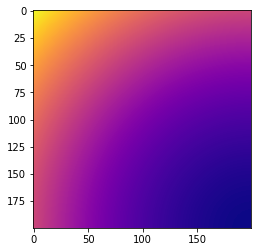

In [140]:
center = 200,200
parabolicImage = np.fromfunction(paraboloid, (200,200))
imshow(parabolicImage, cmap='plasma')

* ``identity(n)``

  returns an ``n`` x ``n`` identity matrix

In [143]:
np.identity(8)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

- ``where(cond, x, y)``

  array form of a conditional

      for each (i,j,...)
        if cond(i, j, ...):
          a[i, j, ...] = x(i, j, ...)
        else       
          a[i, j, ...] = y(i, j, ...)

In [144]:
a

array([[  0,   1,   2,   3,   4,   5,   6,   7],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [104, 105, 106, 107, 108, 109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127]])

In [147]:
mask = np.greater(a, 37)
mask

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  Tr

In [148]:
np.where(mask, a, -a)

array([[  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7],
       [ -8,  -9, -10, -11, -12, -13, -14, -15],
       [-16, -17, -18, -19, -20, -21, -22, -23],
       [-24, -25, -26, -27, -28, -29, -30, -31],
       [-32, -33, -34, -35, -36, -37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [104, 105, 106, 107, 108, 109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127]])

### The ``numpy.linalg`` Subpackage: Linear Algebra

This has all of the stuff you've forgotten from the linear algebra class you took. It uses the standard ``BLAS`` and ``LAPACK`` packages (written in *very* optimized C). Import it with:

In [149]:
import numpy.linalg as la

In [150]:
a3x3 = np.arange(9)
a3x3.shape = (3,3)

* ``norm(v)``

  returns the ($L^2$) norm of a vector

In [152]:
v0

array([1, 2, 3])

In [153]:
la.norm(v0)

3.7416573867739413

It's the same as...

In [154]:
(v0 @ v0)**0.5

3.7416573867739413

* ``inv(array)``

  returns the inverse of the array.

In [155]:
a = np.array((
    (2, 1, 0),
    (1, 2, 1),
    (0, 1, 2)
))
aInv = la.inv(a)
aInv

array([[ 0.75, -0.5 ,  0.25],
       [-0.5 ,  1.  , -0.5 ],
       [ 0.25, -0.5 ,  0.75]])

In [156]:
a @ aInv

array([[ 1.000e+00,  0.000e+00,  0.000e+00],
       [-5.551e-17,  1.000e+00,  1.110e-16],
       [-1.110e-16,  2.220e-16,  1.000e+00]])

  + ``solve(a, b)``

    gives ``x`` where ``a @ x = b``  (i.e. $\mathbf{a}\mathbf{x}=\mathbf{b}$)

In [157]:
x = la.solve(a, v0)
x

array([5.00e-01, 1.48e-16, 1.50e+00])

In [158]:
a.dot(x) - v0

array([ 0.000e+00,  0.000e+00, -4.441e-16])

+ ``eigvals(a)``

    gives ``a``'s eigenvalues

In [159]:
la.eigvals(a)

array([3.414, 2.   , 0.586])

  + ``eig(a)``

    gives the eigenvalues and eigenvectors of ``a`` as a tuple

In [160]:
la.eig(a)

(array([3.414, 2.   , 0.586]),
 array([[-5.000e-01,  7.071e-01,  5.000e-01],
        [-7.071e-01,  4.059e-16, -7.071e-01],
        [-5.000e-01, -7.071e-01,  5.000e-01]]))

  + ``lstsq(a, b)``

    computes the "least-squares" solution ``x`` to ``a.dot(x) = b``
    (i.e. $\mathbf{a}\mathbf{x}=\mathbf{b}$). Unlike ``solve()``, this works
    even if ``a`` is not square.

In [162]:
a = np.array(((1, 2, 3), (4, 5, 6)))
b = np.array((-1, 1))
(x, resids, rank, singvals) = la.lstsq(a, b, rcond=None)

FYI, the return tuple is

* ``x``

* the residuals

* the rank (number of independent dimensions)

* the singular values

### The ``numpy.matrix`` Subpackage: Matrices

- separate class ``Matrix``

- subclass of ``ndarray``

- strictly 2D

- focusses on linear algebra operations

- ongoing issue among ``numpy`` cognoscenti: Should ``matrix`` be deprecated?

  * matrix-specific design is convenient

  * installed base

  * much overlap with (say) ``linalg``

- I say:

  Use ``numpy`` unless you find something in ``matrix`` you can't get elsewhere.

### The ``numpy.ma`` Subpackage: Masked Arrays

- Allows "holes" in arrays to deal with missing or sparse data.

- Associates a boolean validity array with a conventional array.

### The ``numpy.random`` Subpackage: Random Arrays

* ``rand(d0, d1, ...)``

  returns an array of arbitrary dimensionality filled with random floats
  between 0 and 1 (inclusive)

In [164]:
np.random.rand(5, 5)

array([[0.897, 0.32 , 0.975, 0.692, 0.514],
       [0.825, 0.382, 0.252, 0.437, 0.191],
       [0.274, 0.452, 0.528, 0.974, 0.221],
       [0.075, 0.261, 0.982, 0.995, 0.915],
       [0.657, 0.619, 0.935, 0.381, 0.097]])

* ``randint(low[, high, size])``

  returns an array of ints from low (inclusive) to high (exclusive)

In [166]:
np.random.randint(5, size=(5,5))

array([[0, 2, 3, 4, 4],
       [4, 4, 3, 4, 4],
       [4, 0, 2, 4, 0],
       [4, 0, 1, 4, 3],
       [1, 4, 2, 2, 4]])

### Summary

There are a lot of other packages in ``numpy`` and others which use ``numpy``. Be sure to check the PyPI repository before you start developing your own.